<a href="https://colab.research.google.com/github/ngdodd/transformers/blob/master/combine_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the data and install dependencies

In [ ]:
!mkdir data
!wget https://raw.githubusercontent.com/text-machine-lab/quail/master/quail_v1.3/json/train.jsonl -O data/train.jsonl
!wget https://raw.githubusercontent.com/text-machine-lab/quail/master/quail_v1.3/json/dev.jsonl -O data/dev.jsonl
!wget https://raw.githubusercontent.com/text-machine-lab/quail/master/quail_v1.3/json/challenge.jsonl -O data/challenge.jsonl
!wget https://raw.githubusercontent.com/ngdodd/transformers/master/examples/multiple-choice/datasets/synthetic/with_sequential/synthetic_with_nei_cleaned_dev.jsonl -O data/synthetic_dev.jsonl
!wget https://raw.githubusercontent.com/ngdodd/transformers/master/examples/multiple-choice/datasets/synthetic/with_sequential/synthetic_with_nei_cleaned_train.jsonl -O data/synthetic_train.jsonl
!wget https://raw.githubusercontent.com/ngdodd/transformers/master/examples/multiple-choice/datasets/synthetic/without_sequential/synthetic_with_nei_without_sequential_cleaned_dev.jsonl -O data/synthetic_without_sequential_dev.jsonl
!wget https://raw.githubusercontent.com/ngdodd/transformers/master/examples/multiple-choice/datasets/synthetic/without_sequential/synthetic_with_nei_wihtout_sequential_cleaned_train.jsonl -O data/synthetic_without_sequential_train.jsonl
!wget https://raw.githubusercontent.com/ngdodd/transformers/master/examples/multiple-choice/datasets/synthetic/quail_dev_key.json -O data/quail_dev_key.json
!wget https://raw.githubusercontent.com/ngdodd/transformers/master/examples/multiple-choice/datasets/synthetic/synthetic_dev_key.json -O data/synthetic_dev_key.json

!pip install datasets pyarrow==2.0.0

--2020-11-29 18:27:11--  https://raw.githubusercontent.com/text-machine-lab/quail/master/quail_v1.3/json/train.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24941234 (24M) [text/plain]
Saving to: ‘data/train.jsonl’

data/train.jsonl    100%[===================>]  23.79M  46.7MB/s    in 0.5s    

2020-11-29 18:27:12 (46.7 MB/s) - ‘data/train.jsonl’ saved [24941234/24941234]

--2020-11-29 18:27:12--  https://raw.githubusercontent.com/text-machine-lab/quail/master/quail_v1.3/json/dev.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

Combine datasets

In [ ]:
import json
from datasets import load_dataset

def combine_datasets(dataset_a, dataset_b, output_path):
    # Write both to disk, reload and shuffle, optionally change sequential name, then save again
    with open(output_path, 'w', encoding='utf-8') as w:
        for entry in dataset_a:
            w.write(json.dumps(entry) + '\n')
        for entry in dataset_b:
            w.write(json.dumps(entry) + '\n')
    # change_sequential_name = lambda e: e['question_type'] = 'Subsequent_state' if e['question_type'] == 'Sequential'
    combined = load_dataset('json', data_files=output_path)['train'].shuffle()#.map(change_sequential_name)
    with open(output_path, 'w', encoding='utf-8') as w:
        for entry in combined:
            w.write(json.dumps(entry) + '\n')

quail_train = load_dataset('json', data_files='data/train.jsonl')['train']
quail_dev = load_dataset('json', data_files='data/dev.jsonl')['train']
synthetic_train = load_dataset('json', data_files='data/synthetic_train.jsonl')['train']
synthetic_dev = load_dataset('json', data_files='data/synthetic_dev.jsonl')['train']
synthetic_without_seq_train = load_dataset('json', data_files='data/synthetic_without_sequential_train.jsonl')['train']
synthetic_without_seq_dev = load_dataset('json', data_files='data/synthetic_without_sequential_dev.jsonl')['train']

combine_datasets(quail_train, synthetic_train, 'synthetic_with_quail_train.jsonl')
combine_datasets(quail_dev, synthetic_dev, 'synthetic_with_quail_dev.jsonl')
combine_datasets(quail_train, synthetic_without_seq_train, 'synthetic_without_seq_with_quail_train.jsonl')
combine_datasets(quail_dev, synthetic_without_seq_dev, 'synthetic_without_seq_with_quail_dev.jsonl')
combined_train = load_dataset('json', data_files='synthetic_with_quail_train.jsonl')['train']
combined_dev = load_dataset('json', data_files='synthetic_with_quail_dev.jsonl')['train']
combine_datasets(combined_train, combined_dev, 'synthetic_with_quail.jsonl')

Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-bc86a795642ca07e/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-064db6c7d01ca5e7/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-a271f0f78d173245/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-2e08b01f91828435/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-94aa6ce4590ea652/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-4489200e4f480f97/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-d8a486cdf772ae8e/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-68eea2ebc8a0778d/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-f9a04e3f30658c2c/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-c35966de482b8376/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-f2146117d63d355e/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-7606753712fb407d/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Using custom data configuration default


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-fbcb4f4e8802333b/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.


Create new dev keys for quail + custom combined dataset

In [ ]:
!git clone https://github.com/ngdodd/transformers.git
%cd transformers
!pip install .
!pip install -r ./examples/requirements.txt
!pip install pyarrow==2.0.0
%cd ..

Cloning into 'transformers'...
remote: Enumerating objects: 49872, done.
remote: Total 49872 (delta 0), reused 0 (delta 0), pack-reused 49872
Receiving objects: 100% (49872/49872), 129.43 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (34768/34768), done.
Checking out files: 100% (1540/1540), done.
/content/transformers
Processing /content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1MB 4.2MB/s 
     |████████████████████████████████| 890kB 17.4MB/s 
     |████████████████████████████████| 2.9MB 22.6MB/s 
  Created wheel for transformers: filename=transformers-3.4.0-cp36-none-any.whl size=1297093 sha256=4f7f80cdd2224b2730e5e03ef0327c193fba154f679f72f18ead77fd31028187
  Stored in directory: /tmp/pip-ephem-wheel-cache-xhyoe825/wheels/23/19/dd/2561a4e47240cf6b307729d58e56f8077dd0c698f5992216cf
Successfully built transformers
  Created wheel for sacremos

/content


In [ ]:
!python /content/transformers/examples/multiple-choice/datasets/synthetic/create_dev_key.py --in_file /content/synthetic_with_quail_dev.jsonl --out_file synthetic_with_quail_dev_key.json --verbose True

2020-11-29 15:34:33.812727: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using custom data configuration default
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-66106f172cebf2d2/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514. Subsequent calls will reuse this data.
Dataset({
    features: ['id', 'question_type', 'question', 'answers', 'correct_answer_id', 'metadata', 'domain', 'context_id', 'context'],
    num_rows: 45342
})
100% 46/46 [00:01<00:00, 26.39ba/s]
100% 46/46 [00:01<00:00, 26.31ba/s]
100% 46/46 [00:01<00:00, 26.05ba/s]
100% 46/46 [00:01<00:00, 26.03ba/s]
100% 46/46 [00:01<00:00, 25.42ba/s]
100% 46/46 [00:01<00:00, 26.21ba/s]
100% 46/46 [00:01<00:00, 26.02ba/s]
100% 46/46 [00:01<00:00, 25.36ba/s]
100% 46/46 [00:01<00:00, 26.18ba/s]
100% 46/46 [00:01<00:00, 26.23ba/s]

type_map: {'Temporal_order': Dataset({
    features: ['id', 'question_type'

Plot word count distribution for the combined datasets

Using custom data configuration default
Reusing dataset json (/root/.cache/huggingface/datasets/json/default-d4e046aede0fc22b/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514)
Using custom data configuration default
Reusing dataset json (/root/.cache/huggingface/datasets/json/default-59d9ff8768c89a9b/0.0.0/70d89ed4db1394f028c651589fcab6d6b28dddcabbe39d3b21b4d41f9a708514)


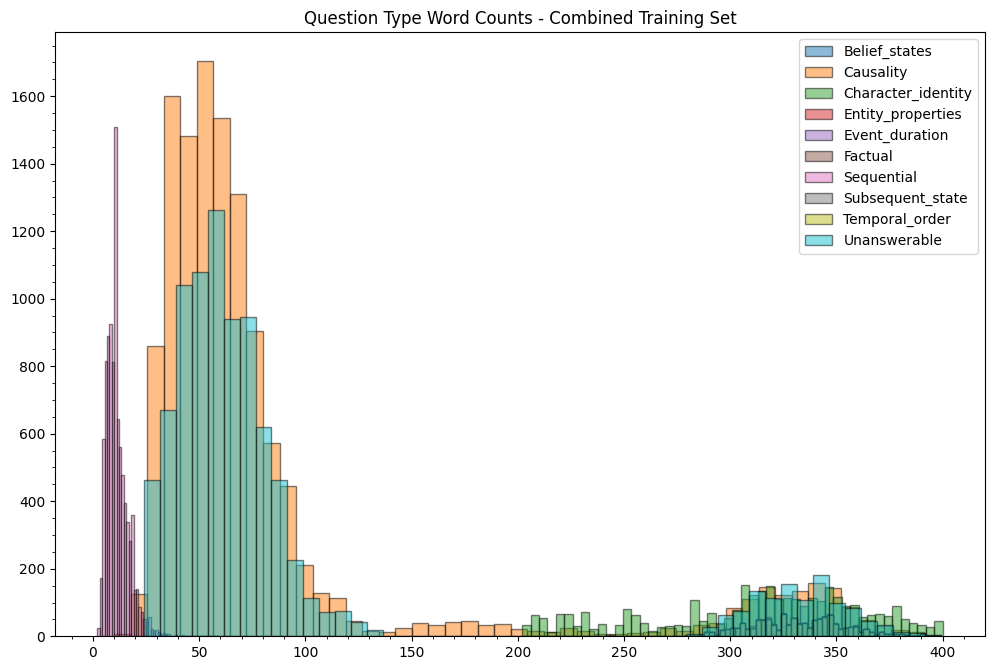

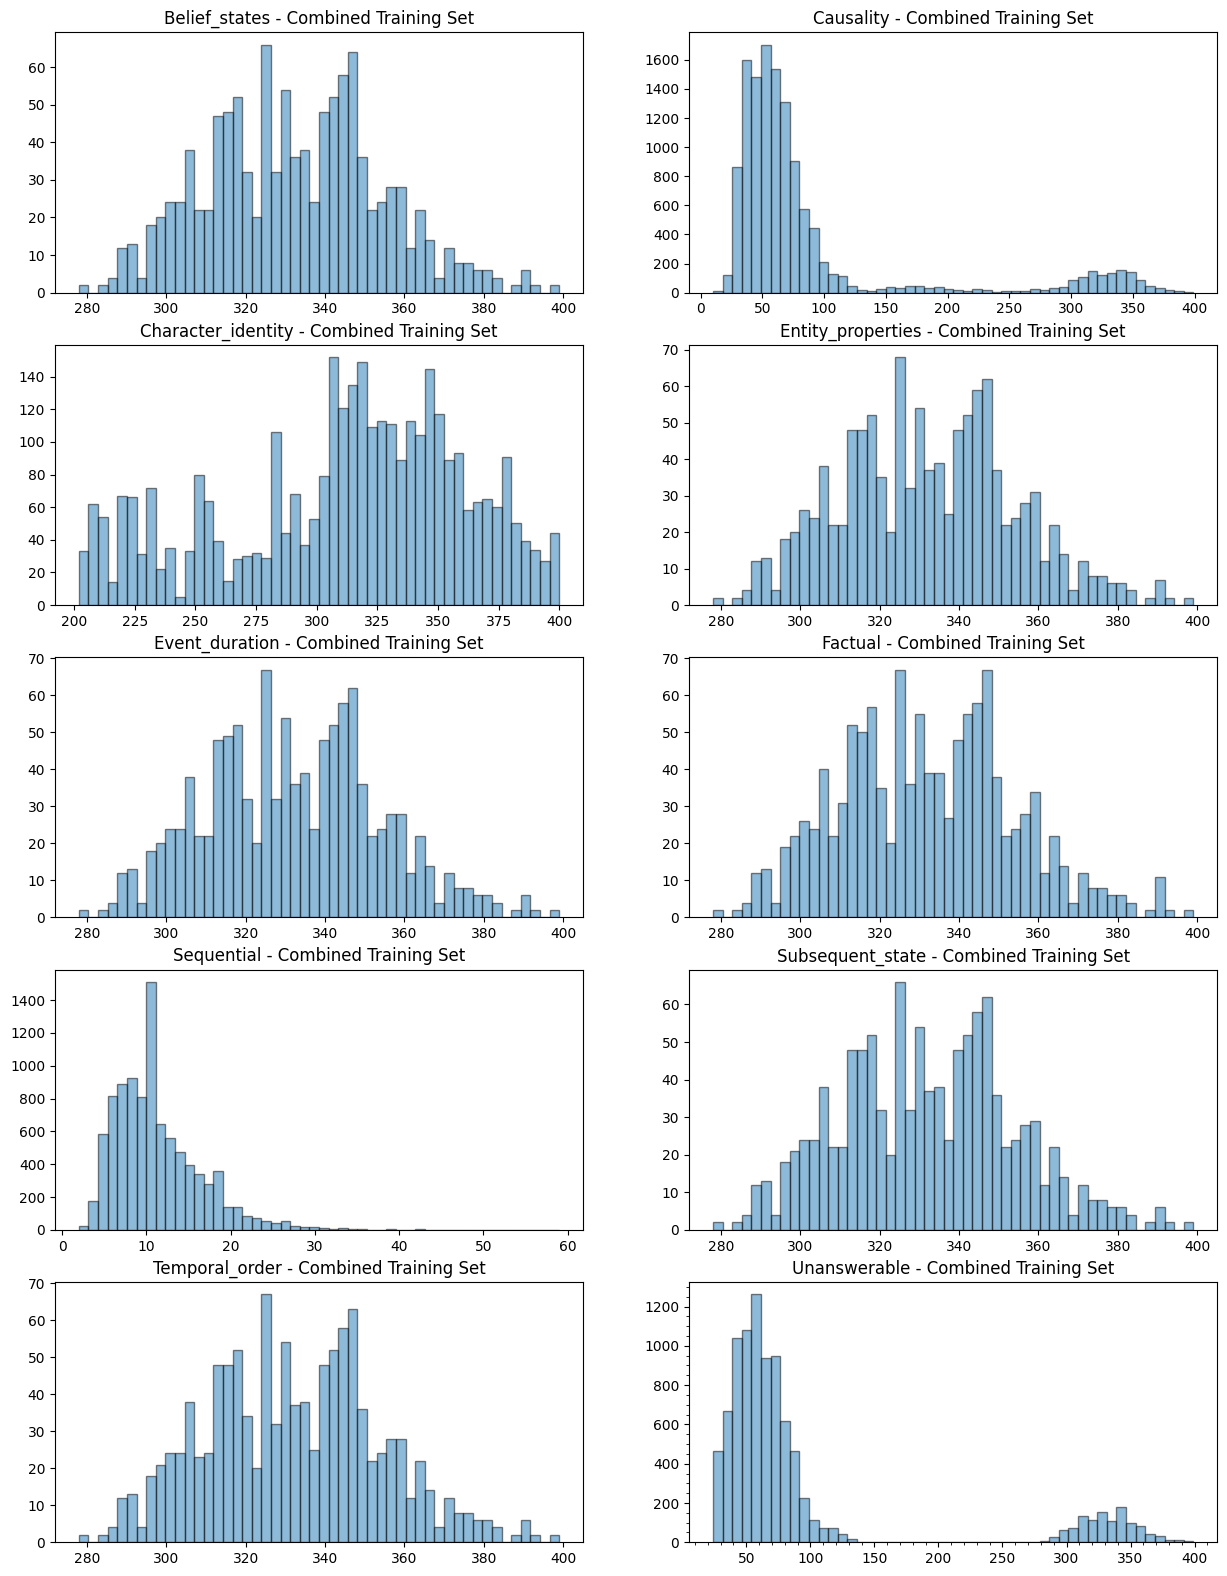

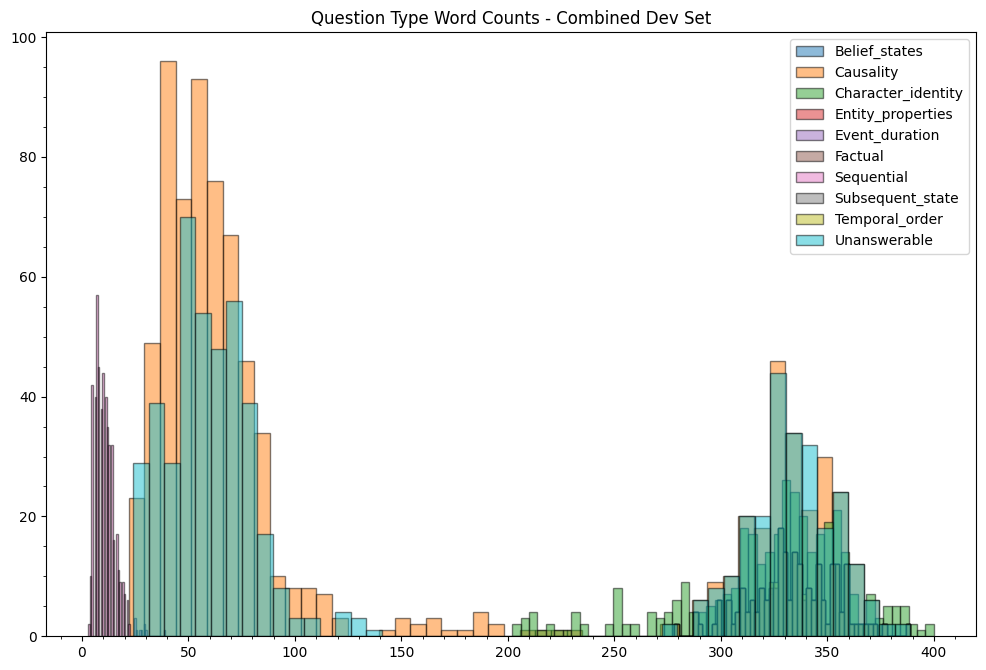

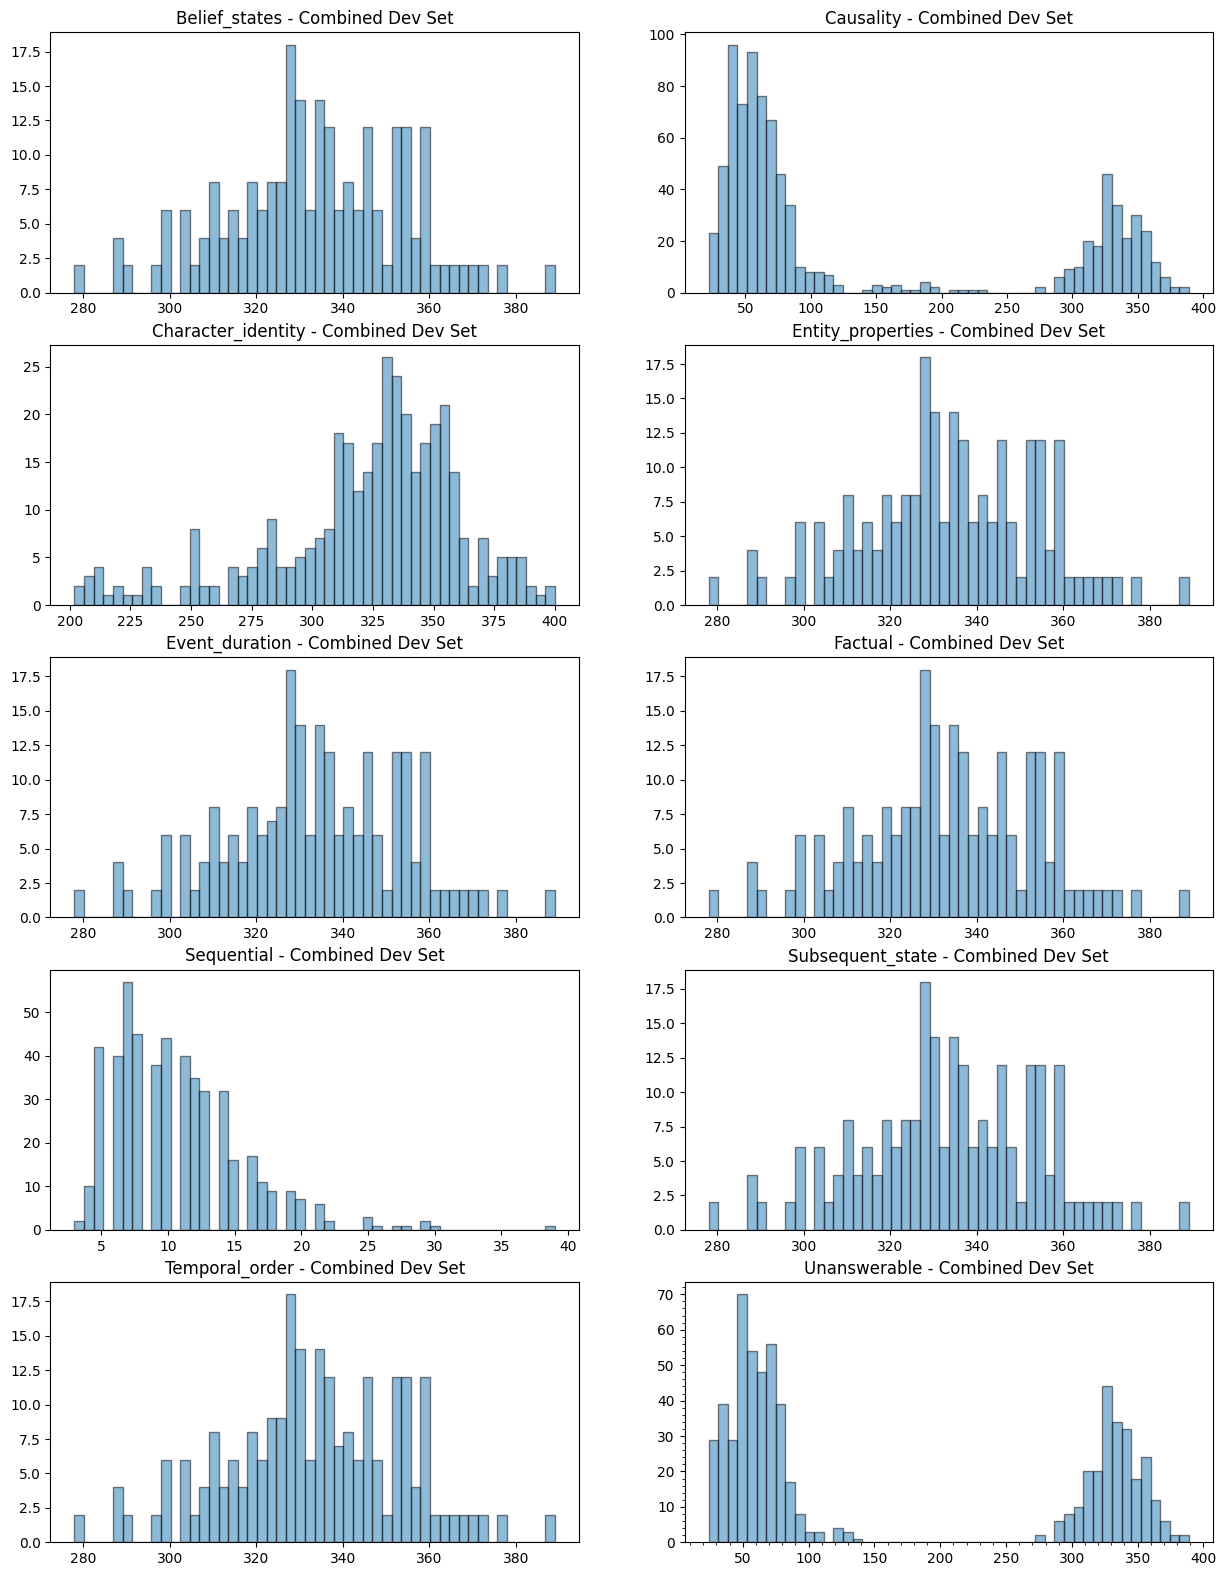

In [ ]:
import string
import matplotlib.pyplot as plt

def plot_word_counts(dataset, name):
    word_counts = {}
    for entry in dataset:
        q_type = entry['question_type']
        word_count = len(entry['context'].translate(str.maketrans('', '', string.punctuation)).split())
        if q_type in word_counts:
            word_counts[q_type].append(word_count)
        else:
            word_counts[q_type] = [word_count]
    
    plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title("Question Type Word Counts - {}".format(name))
    types_ = sorted(list(word_counts.keys()))
    for type_ in types_:
        plt.hist(word_counts[type_], bins=50, edgecolor='k', label=type_, alpha=0.5)
    plt.minorticks_on()
    plt.legend()

    plt.figure(figsize=(15,20), dpi= 100, facecolor='w', edgecolor='k')
    for itr, type_ in enumerate(types_):
        plt.subplot(5,2,itr+1)
        plt.title("{} - {}".format(type_, name))
        plt.hist(word_counts[type_], bins=50, edgecolor='k', label=type_, alpha=0.5)
    plt.minorticks_on()

combined_train = load_dataset('json', data_files='/content/synthetic_with_quail_train.jsonl')['train']
combined_dev = load_dataset('json', data_files='/content/synthetic_with_quail_dev.jsonl')['train']
plot_word_counts(combined_train, "Combined Training Set")
plot_word_counts(combined_dev, "Combined Dev Set")